### Perform All steps of EDA and document conclusions and then perform the feature engineering.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance_data.csv')

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

## Remember, eda is an iterative process

### 1.  the first step is to label the column, like which type of column is it

### Column Types

- **Numerical** - PatientID, age, bmi, bloodpressure, claim, children
- **Categorical** - gender, diabetic, smoker, region
- **Mixed** - 

### 2. and the next step is Univariate Analysis

### Univariate Analysis (Single Variable Analysis) --> and each column is called the variable, and we perform analysis on each varible independently.

Univariate analysis focuses on analyzing each feature in the dataset independently.

What we will do in the Univariate Analysis :-
- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age

**conclusions**

- Age is normally(almost) distributed
- 0.004% of the values are missing
- There are no outliers

In [5]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

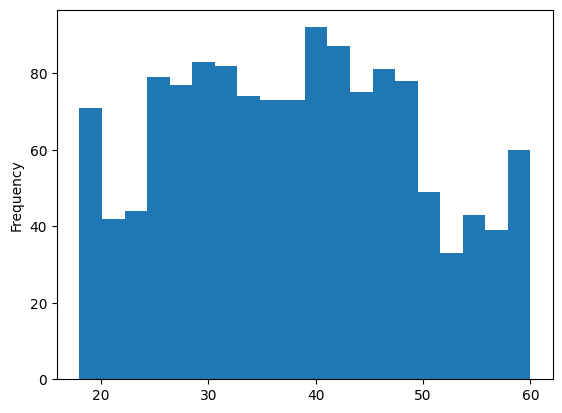

In [6]:
df['age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

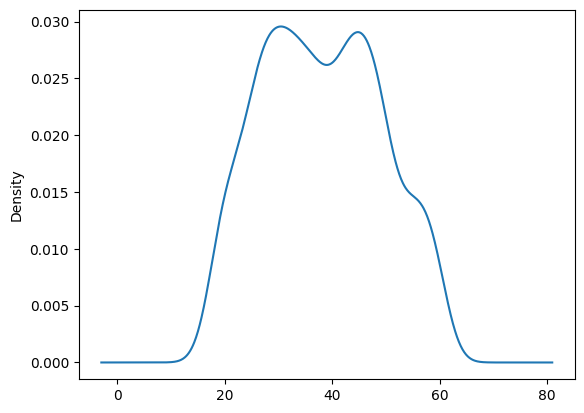

In [7]:
df['age'].plot(kind='kde')

In [8]:
df['age'].skew()

np.float64(0.11361133741072633)

<Axes: >

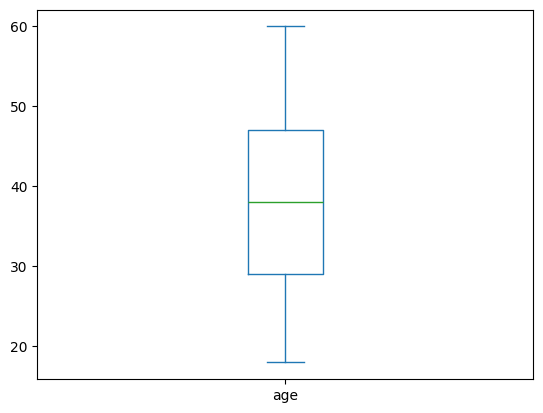

In [9]:
df['age'].plot(kind='box')

In [10]:
df['age'].isnull().sum()/len(df['age'])

np.float64(0.0037313432835820895)

### bmi

**conclusion**

- The data is normally(almost) distributed
- their are the outliers, like soome of the patients have bmi > 47

In [11]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='Frequency'>

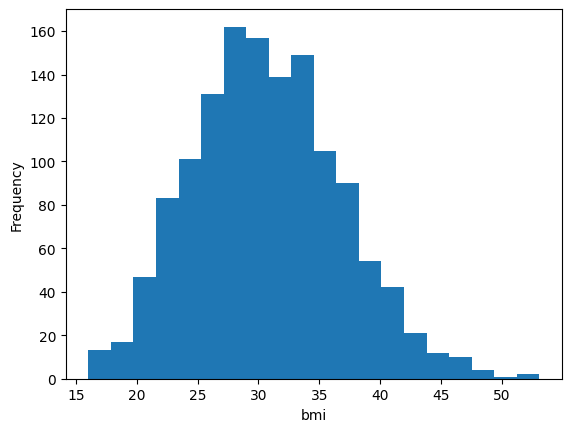

In [12]:
df['bmi'].plot(kind='hist', bins=20, xlabel='bmi')


<Axes: ylabel='Density'>

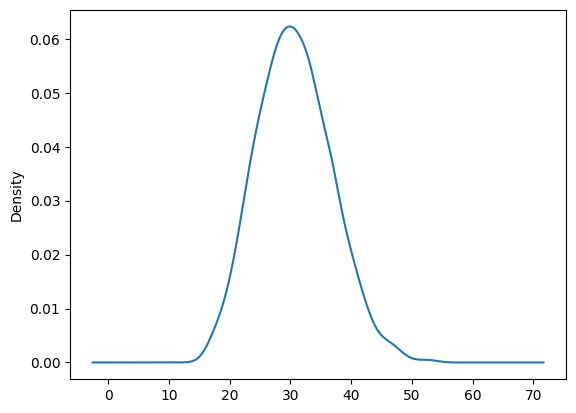

In [13]:
df['bmi'].plot(kind='kde', xlabel='bmi')

In [14]:
df['bmi'].skew()

np.float64(0.28597245020808587)

<Axes: >

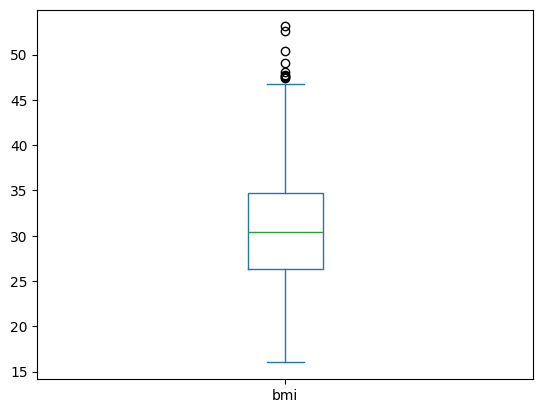

In [15]:
df['bmi'].plot(kind='box')

In [16]:
df[df['bmi'] > 47]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
579,579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
696,696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1299,1299,1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1306,1306,1307,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [17]:
df['bmi'].isnull().sum()

np.int64(0)

### bloodpressure and claim

**conclusion**

 1. bloodpressure :-
- It is slightly skewd to the positive(right skew) at value 1.5
- and there are outliers 

 2. claim :-
- It is slightly skewd to the positive(right skew) at value 1.5
- Outliers are present


In [18]:
df['bloodpressure'].describe()
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: xlabel='bp', ylabel='Frequency'>

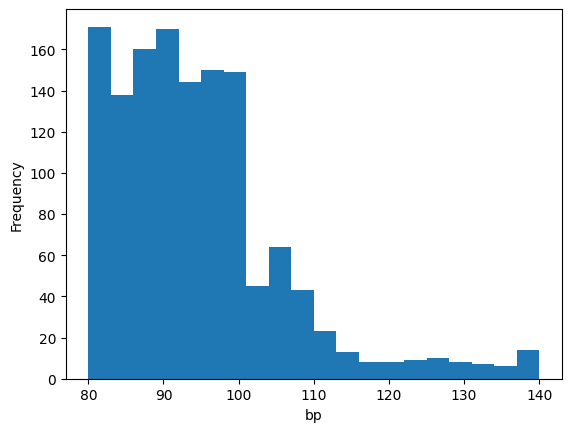

In [19]:
df['bloodpressure'].plot(kind='hist', bins=20, xlabel='bp')

<Axes: ylabel='Density'>

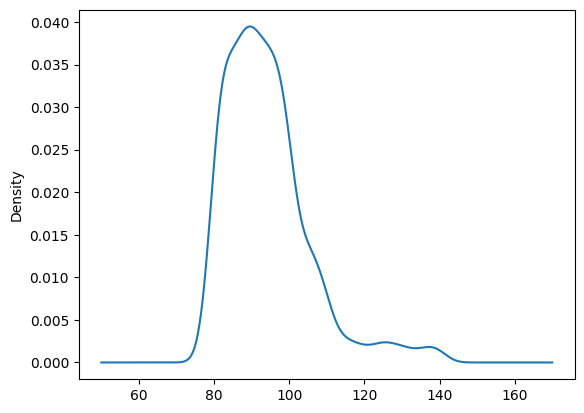

In [20]:
df['bloodpressure'].plot(kind='kde')

In [21]:
df['bloodpressure'].skew()

np.float64(1.4835342102293079)

<Axes: >

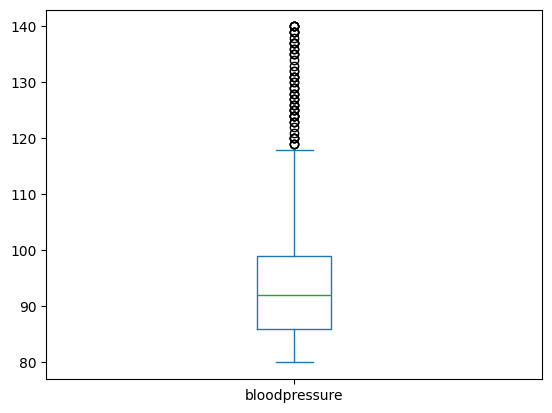

In [22]:
df['bloodpressure'].plot(kind='box')

In [23]:
df[df['bloodpressure'] > 118]
# df['bloodpressure'].sample(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,1326,52.0,female,36.4,133,Yes,1,Yes,northeast,48517.56
1332,1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83


In [26]:
df['claim'].describe()
df['claim'].isna().sum()

np.int64(0)

<Axes: xlabel='claim', ylabel='Frequency'>

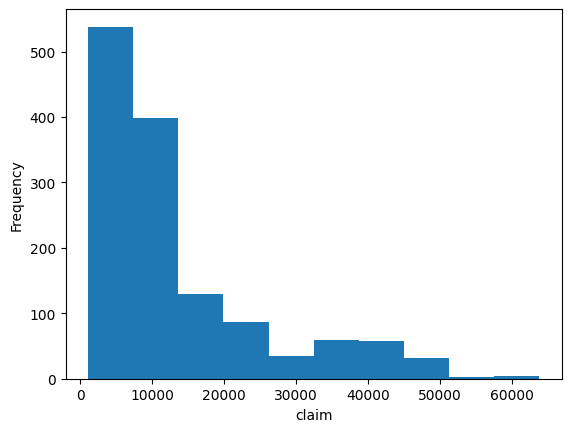

In [29]:
df['claim'].plot(kind='hist', bins=10, xlabel='claim')

<Axes: ylabel='Density'>

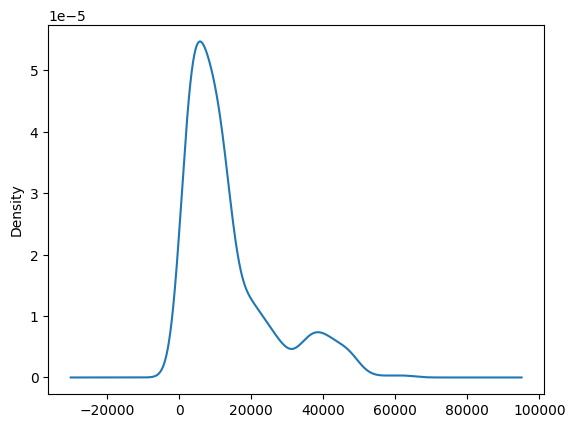

In [30]:
df['claim'].plot(kind='kde')

In [31]:
df['claim'].skew()

np.float64(1.5167468509489237)

<Axes: >

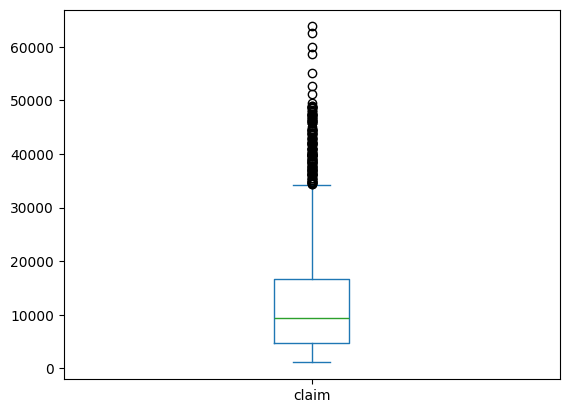

In [32]:
df['claim'].plot(kind='box')

In [33]:
df[df['claim'] > 34000]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1196,1196,1197,36.0,female,31.4,136,Yes,0,Yes,southwest,34166.27
1197,1197,1198,30.0,male,31.1,136,No,0,Yes,northeast,34254.05
1198,1198,1199,22.0,male,31.7,115,No,2,Yes,southeast,34303.17
1199,1199,1200,30.0,female,33.1,93,Yes,0,Yes,southeast,34439.86
1200,1200,1201,40.0,male,32.7,98,No,0,Yes,southwest,34472.84
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### children

**conclusion**
- slightly skewd to the right side at value 0.94
- there are no outliers

In [49]:
df['children'].isna().sum()

np.int64(0)

<Axes: xlabel='childrens', ylabel='Frequency'>

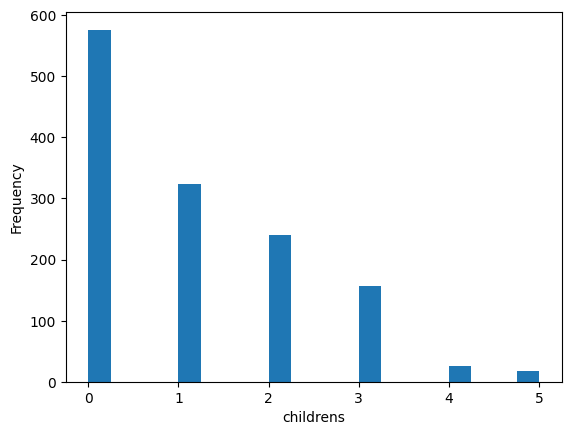

In [51]:
df['children'].plot(kind='hist', bins=20, xlabel='childrens')

<Axes: ylabel='Density'>

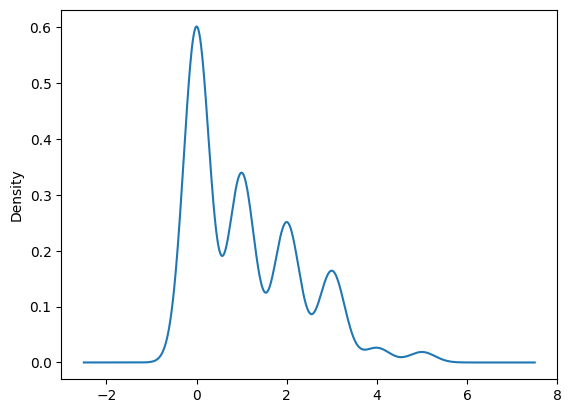

In [52]:
df['children'].plot(kind='kde')

In [53]:
df['children'].skew()

np.float64(0.9402991133470963)

<Axes: >

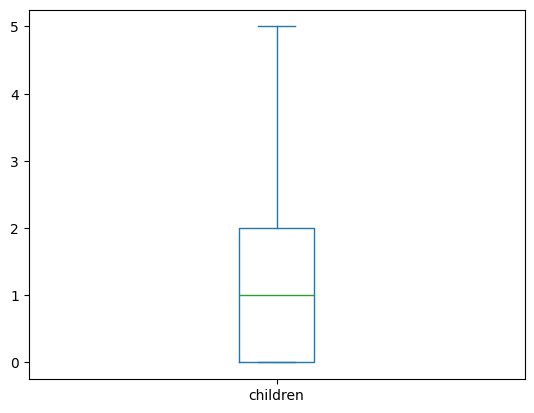

In [55]:
df['children'].plot(kind='box')

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [34]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### gender

**conclusions**

- The frequency of the male is slightly greater than the female patients

In [41]:
df['gender'].isna().sum()
df['gender'].describe()

count     1340
unique       2
top       male
freq       678
Name: gender, dtype: object

In [35]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

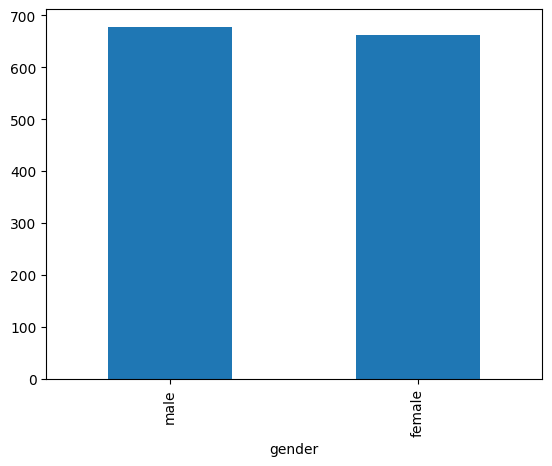

In [36]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

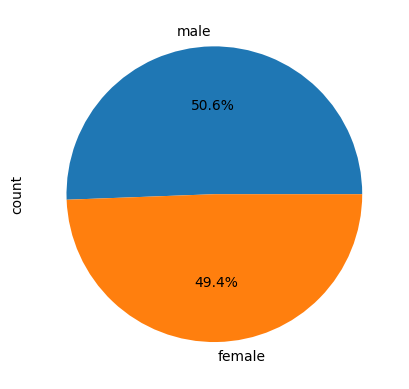

In [38]:
df['gender'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### diabetic

**conclusion**
- Around 52% of the patients have no diabeties

In [43]:
df['diabetic'].describe()
df['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: xlabel='diabetic'>

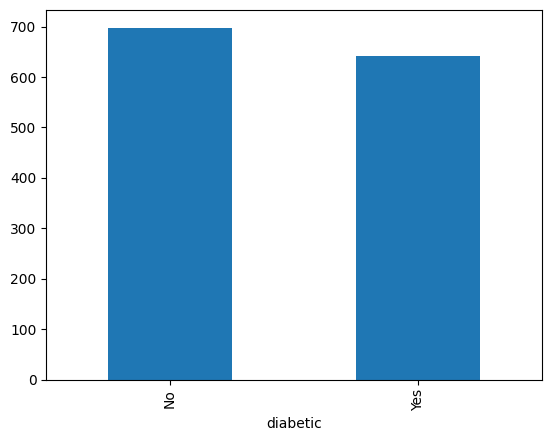

In [46]:
df['diabetic'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

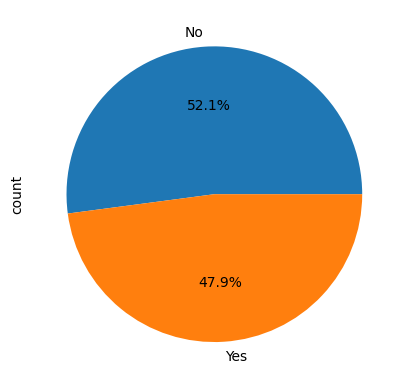

In [47]:
df['diabetic'].value_counts().plot(kind='pie', autopct='%0.1f%%')

### smoker

**conclusion**

- the population of the non-smoker is greater than smokers

In [58]:
df['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

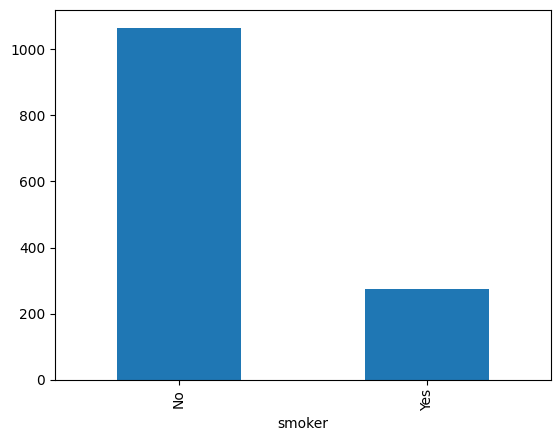

In [59]:
df['smoker'].value_counts().plot(kind='bar', xlabel='smoker')

<Axes: ylabel='count'>

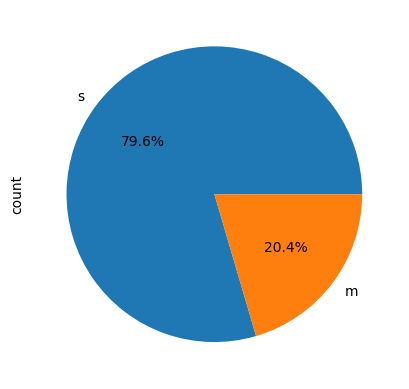

In [ ]:
df['smoker'].value_counts().plot(kind='pie', autopct= '%1.1f%%')

### region

**conclusion**
- There are 3 patients who have no regions specified

In [69]:
df['region'].isna().sum()

np.int64(3)

In [73]:
df[df['region'].isna()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
13,13,14,32.0,male,27.6,100,No,0,No,NaN,1252.41
14,14,15,40.0,male,28.7,81,Yes,0,No,NaN,1253.94
15,15,16,32.0,male,30.4,86,Yes,0,No,NaN,1256.30


In [70]:
df['region'].value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

<Axes: xlabel='region'>

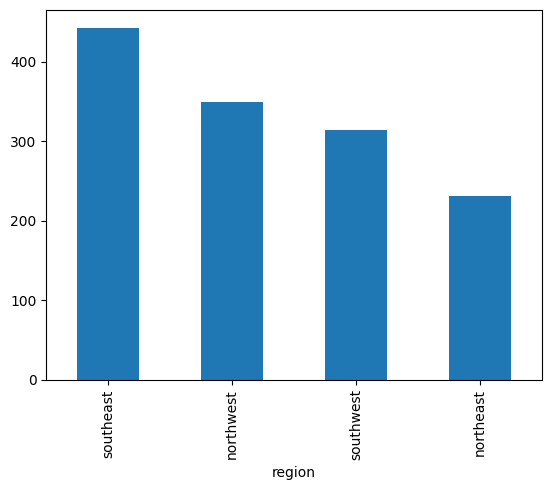

In [71]:
df['region'].value_counts().plot(kind='bar', xlabel='region')

<Axes: ylabel='count'>

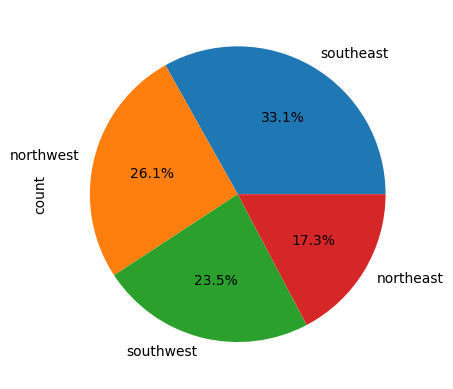

In [72]:
df['region'].value_counts().plot(kind='pie', autopct= '%1.1f%%')

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [75]:
df
df[df['age'].isna()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


<Axes: xlabel='region'>

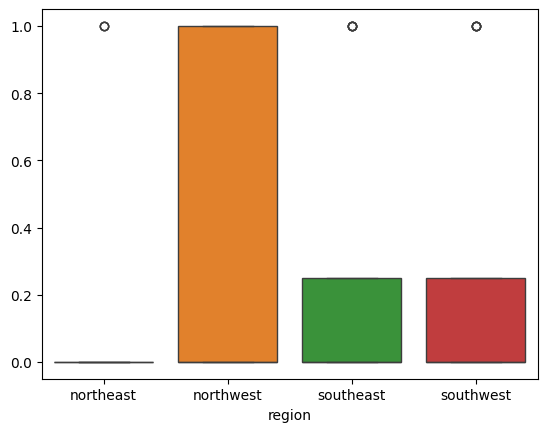

In [102]:
sns.boxplot(pd.crosstab(df['claim'], df['region']).sample(20))

### claim and smoker (bivariate analysis)

**conclusion**
- from the bivariate analysis between claim and smoker, we got to know that the smoker's have slightly higher median and the claim amount.

<Axes: xlabel='smoker', ylabel='claim'>

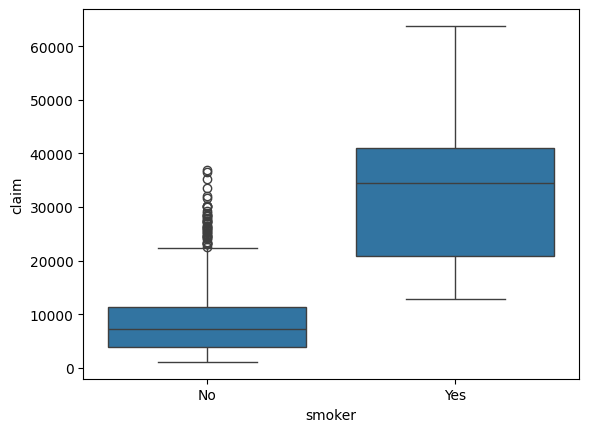

In [116]:
sns.boxplot(x='smoker', y='claim', data=df)

### claim and gender (bivariate analysis)

**conclusion**
- from the bivariate analysis between claim and gender, we got to know that the female's have slightly higher median and the claim amount.

<Axes: xlabel='gender', ylabel='claim'>

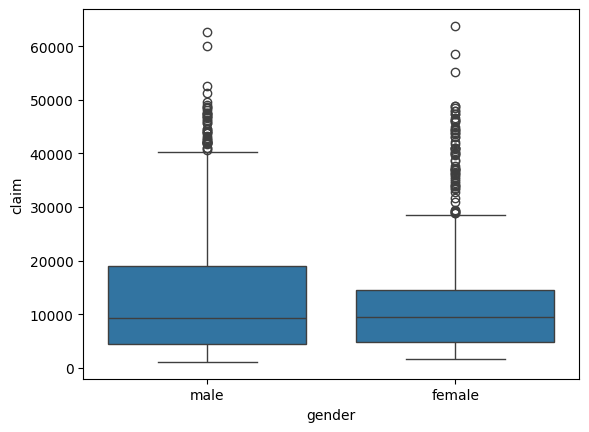

In [113]:
# sns.heatmap(pd.crosstab(df['claim'], df['gender']))
# pd.crosstab(df['claim'], df['gender'])

sns.boxplot(x='gender', y='claim', data=df)
# sns.violinplot(x='gender', y='claim', data=df)


### claim and diabetic (bivariate analysis)

**conclusion**
- from the bivariate analysis between claim and diabetic, we got to know that the no patients with diabeties and no diabeties has high claim amount, cause the median is same for both fields.

<Axes: xlabel='diabetic', ylabel='claim'>

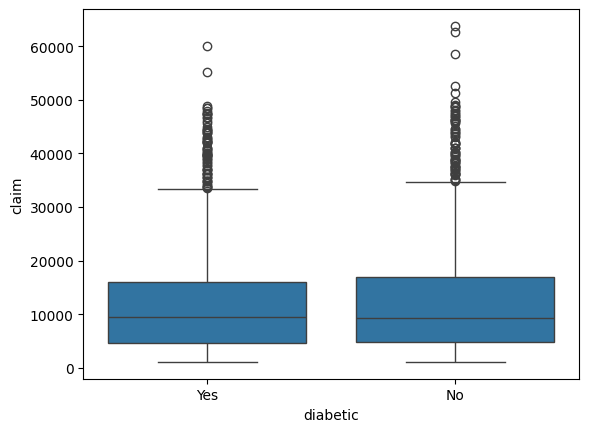

In [117]:
sns.boxplot(x='diabetic', y='claim', data=df)

### Now, we will do the nummerical to numerical analysis